<a href="https://colab.research.google.com/github/imadegunawinangun/NLP-Desi---Deteksi-Emosi/blob/main/Desi_Detektor_Emosi_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!git clone https://github.com/imadegunawinangun/NLP-Desi---Deteksi-Emosi

Cloning into 'NLP-Desi---Deteksi-Emosi'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 22), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [4]:
!ls NLP-Desi---Deteksi-Emosi

archive.zip		   Desi_Detektor_Emosi_last.ipynb  test.txt
data.txt		   imdb_indonesian_movies_2.csv
Desi_Detektor_Emosi.ipynb  LICENSE


In [5]:
import pandas as pd
import os
import numpy as np


In [6]:
read_file = pd.read_csv (r'NLP-Desi---Deteksi-Emosi/data.txt',error_bad_lines=False,sep=';')
read_file.to_csv ('NLP-Desi---Deteksi-Emosi/data.csv', index=None)

b'Skipping line 144: expected 2 fields, saw 3\nSkipping line 163: expected 2 fields, saw 3\nSkipping line 460: expected 2 fields, saw 3\nSkipping line 496: expected 2 fields, saw 3\nSkipping line 541: expected 2 fields, saw 3\nSkipping line 557: expected 2 fields, saw 3\nSkipping line 697: expected 2 fields, saw 3\nSkipping line 882: expected 2 fields, saw 3\nSkipping line 890: expected 2 fields, saw 3\nSkipping line 908: expected 2 fields, saw 3\nSkipping line 911: expected 2 fields, saw 3\nSkipping line 1037: expected 2 fields, saw 3\nSkipping line 1070: expected 2 fields, saw 3\nSkipping line 1173: expected 2 fields, saw 3\nSkipping line 1193: expected 2 fields, saw 3\nSkipping line 1197: expected 2 fields, saw 3\nSkipping line 1317: expected 2 fields, saw 3\nSkipping line 1698: expected 2 fields, saw 3\nSkipping line 1716: expected 2 fields, saw 3\nSkipping line 1874: expected 2 fields, saw 3\nSkipping line 2188: expected 2 fields, saw 3\nSkipping line 2228: expected 2 fields, saw 

In [7]:
datadir = 'NLP-Desi---Deteksi-Emosi/'
columns = ['kalimat', 'emosi']
data = pd.read_csv(os.path.join(datadir, 'data.csv'), names = columns)
#data['emosi']=data['emosi'].astype("category")
pd.set_option('display.max_colwidth', -1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,kalimat,emosi
0,saya tidak merasa terhina,kesedihan
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,kesedihan
2,saya mengambil waktu sebentar untuk memposting saya merasa serakah salah,kemarahan
3,saya pernah merasa nostalgia tentang perapian saya akan tahu bahwa itu masih di properti,cinta
4,saya merasa kesal,kemarahan
...,...,...
15853,saya hanya memiliki waktu yang sangat singkat di beanbag dan saya berkata kepada anna bahwa saya merasa seperti saya telah dipukuli,kesedihan
15854,saya sekarang berbalik dan saya merasa menyedihkan bahwa saya masih menunggu meja dan subbing dengan gelar mengajar,kesedihan
15855,saya merasa kuat dan baik secara keseluruhan,kegembiraan
15856,Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t,kemarahan


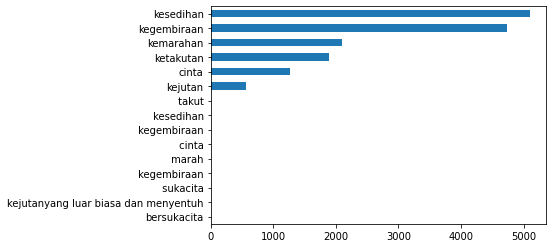

In [8]:
data.emosi.value_counts().sort_values().plot(kind = 'barh')

In [9]:
from sklearn.utils import shuffle

def data_balancing(data, samples_per_bin ):
  print('total data:', len(data))
  remove_list = []
  for j in range(1):
    list_ = []
    for i in range(len(data)):
      list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  list_ = []
  list_.append(data)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  print('removed:', len(remove_list))
  data_=data.copy()
  data_.drop(data_.index[remove_list], inplace=True)
  print('remaining:', len(data_))
  return data_

total data: 5094
removed: 4094
remaining: 1000
total data: 4739
removed: 3739
remaining: 1000
total data: 2096
removed: 1096
remaining: 1000
total data: 1886
removed: 886
remaining: 1000
total data: 1266
removed: 266
remaining: 1000


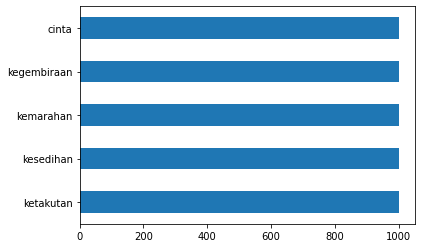

In [10]:
data.loc[data['emosi'] == 'kejutan']
df = pd.concat([data_balancing(data.loc[data['emosi'] == 'kesedihan'],1000), 
                data_balancing(data.loc[data['emosi'] == 'kegembiraan'],1000),
                data_balancing(data.loc[data['emosi'] == 'kemarahan'],1000),
                data_balancing(data.loc[data['emosi'] == 'ketakutan'],1000),
                data_balancing(data.loc[data['emosi'] == 'cinta'],1000)], 
               sort=True)
df['emosi']=df['emosi'].astype("category")
df.emosi.value_counts().plot(kind = 'barh')


In [11]:
category = pd.get_dummies(df.emosi)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emosi')
df_baru

,kalimat,cinta,kegembiraan,kemarahan,kesedihan,ketakutan
0,saya tidak merasa terhina,0,0,0,1,0
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,0,0,0,1,0
10,Saya merasa seperti saya harus membuat penderitaan yang saya lihat berarti sesuatu,0,0,0,1,0
17,saya merasa sangat menyedihkan sebagian besar waktu,0,0,0,1,0
27,saya menjadi kewalahan dan merasa kalah,0,0,0,1,0
...,...,...,...,...,...,...
15794,Saya lebih baik dari perasaan Anda yang lain tetapi perasaan diterima,1,0,0,0,0
15816,Saya merasa akan ada sekuel dan saya ingin menutup akhir buku ini,1,0,0,0,0
15821,saya suka apa yang saya lakukan dan saya merasa sangat diberkati dan beruntung dapat bepergian dan menjadi kreatif dan bertemu orang-orang luar biasa dan bangun setiap hari mencintai pekerjaan saya,1,0,0,0,0
15829,saya merasa itu tidak akan mencintai saya tidak memperingatkan Anda tentang krisis sosial yang akan datang yang dihadapi montana,1,0,0,0,0


In [12]:
def load_img_steering(df):
  teks = []
  label = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    teks.append((indexed_data[0]))
    label.append(indexed_data[[1, 2, 3, 4, 5]] )
  data_teks = np.asarray(teks)
  label_teks = np.asarray(label)
  return   data_teks , label_teks
 
data_teks, label_teks = load_img_steering(df_baru)


In [13]:
data_teks

array(['saya tidak merasa terhina',
       'saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga',
       'Saya merasa seperti saya harus membuat penderitaan yang saya lihat berarti sesuatu',
       ...,
       'saya suka apa yang saya lakukan dan saya merasa sangat diberkati dan beruntung dapat bepergian dan menjadi kreatif dan bertemu orang-orang luar biasa dan bangun setiap hari mencintai pekerjaan saya',
       'saya merasa itu tidak akan mencintai saya tidak memperingatkan Anda tentang krisis sosial yang akan datang yang dihadapi montana',
       'saya merasa sangat simpatik terhadap mereka'], dtype='<U403')

In [14]:
label_teks = np.array(label_teks, dtype=np.int32)
label_teks

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int32)

In [15]:
label_teks.shape

(5000, 5)

In [16]:
from sklearn.model_selection import train_test_split

kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(data_teks, label_teks, test_size=0.2)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 10000
tokenizer = Tokenizer(num_words, oov_token='*')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
x_train_tokens = tokenizer.texts_to_sequences(kalimat_latih)
x_valid_tokens = tokenizer.texts_to_sequences(kalimat_test)

x_train_padded = pad_sequences(x_train_tokens) 
x_valid_padded = pad_sequences(x_valid_tokens)


In [18]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_valid_tokens]
num_tokens = np.array(num_tokens)

In [19]:
np.mean(num_tokens)

17.5402

In [20]:
np.max(num_tokens)

67

In [21]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

37

In [22]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9448

In [23]:
print(kalimat_latih[0])
print(np.array(x_train_tokens[0]))
print(np.array(x_train_padded[0]))
print(np.array(tokenizer.sequences_to_texts(x_train_padded)[0]))

saya sedang mengalengkan tomat dan merasa nostalgia
[   2  189 3200 2219    4    3  267]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    2  189 3200 2219    4    3  267]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * saya sedang mengalengkan tomat dan merasa nostalgia


In [24]:
pip install -q -U keras-tuner


     |████████████████████████████████| 96 kB 3.7 MB/s 


In [25]:
import kerastuner.tuners as kt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [32]:
import tensorflow as tf

def model_rnn1(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, hp.Int("Output Embed",min_value= 64, max_value = 256, step= 64), input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(hp.Int("LSTM",min_value= 64, max_value = 256, step= 64)))

  for i in range(hp.Int("Dense Layers", min_value=1, max_value=3)):
      model.add(tf.keras.layers.Dense(hp.Int(f"Dense_{i}_layer", min_value= 64, max_value = 256, step= 64), 
                                   activation='relu'))

  model.add(tf.keras.layers.Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(hp.Choice(f"learning_rate", [ 3e-4,1e-3])),metrics=['accuracy'])
  return model
def model_rnn():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, 192, input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(192))
  model.add(tf.keras.layers.Dense(192, activation='relu'))
 


  model.add(tf.keras.layers.Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3),metrics=['accuracy'])
  return model


In [26]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90 ):  


      print("\nAkurasi telah mencapai >90%!")

      self.model.stop_training = True

callbacks90 = myCallback()

In [27]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`

    super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_rnn1,
                objective='val_accuracy',
                max_trials=1000,)
# Don't pass epochs or batch_size here, let the Tuner tune them.

tuner.search(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
             steps_per_epoch = 500,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=5,
              ),callbacks90
              ]
             )


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
Output Embed      |192               |?                 
LSTM              |256               |?                 
Dense Layers      |2                 |?                 
Dense_0_layer     |192               |?                 
learning_rate     |0.0003            |?                 

Epoch 1/50
500/500 [==============================] - 95s 185ms/step - loss: 1.5288 - accuracy: 0.3111 - val_loss: 1.2560 - val_accuracy: 0.4625
Epoch 2/50
342/500 [===================>..........] - ETA: 28s - loss: 0.9973 - accuracy: 0.6228

KeyboardInterrupt: ignored

In [36]:
model = model_rnn()
num_epochs = 30
history = model.fit(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
             steps_per_epoch = 500,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=20,
                                      restore_best_weights=True

              ),callbacks90
              ]
             )

Epoch 1/50
500/500 [==============================] - 61s 117ms/step - loss: 1.3743 - accuracy: 0.3915 - val_loss: 1.0685 - val_accuracy: 0.5987
Epoch 2/50
500/500 [==============================] - 58s 116ms/step - loss: 0.6316 - accuracy: 0.7736 - val_loss: 0.9157 - val_accuracy: 0.6888
Epoch 3/50
500/500 [==============================] - 57s 115ms/step - loss: 0.3033 - accuracy: 0.8990 - val_loss: 1.1581 - val_accuracy: 0.6862
Epoch 4/50
500/500 [==============================] - 58s 116ms/step - loss: 0.1562 - accuracy: 0.9465 - val_loss: 1.3264 - val_accuracy: 0.6975
Epoch 5/50
500/500 [==============================] - 58s 116ms/step - loss: 0.1041 - accuracy: 0.9625 - val_loss: 1.3923 - val_accuracy: 0.7050
Epoch 6/50
500/500 [==============================] - 58s 116ms/step - loss: 0.0600 - accuracy: 0.9780 - val_loss: 1.6048 - val_accuracy: 0.7212
Epoch 7/50
500/500 [==============================] - 58s 115ms/step - loss: 0.0383 - accuracy: 0.9886 - val_loss: 2.0180 - val_ac

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 37, 192)           1920000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 192)               295680    
_________________________________________________________________
dense_20 (Dense)             (None, 192)               37056     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 965       
Total params: 2,253,701
Trainable params: 2,253,701
Non-trainable params: 0
_________________________________________________________________
